# Cecaj activity & sleep fitbit data
* splitted monthwise and plotted 
    
    data source https://algo-data.quora.com/Data-sets-of-any-type-some-links 

In [17]:
######## config section ########
# specify input files
activity_data_file = "OneYearFitBitDataEdited.csv"
sleep_data_file = "OneYearFitBitDataSleep.csv"


# specify month and year which should be plotted in the rang between 5-2015 and 5-2016
month = '5' # e.g. for June enter 6 not 06
mont_in_words = "May" # only specify this if needed in plot label  -> change also in plot function
year = '2015'

# Specify parameters which should be plotted
activity_parameters_plotted = ['day', 'minutes_intense_activity', 'distance'] 
    # e.g. Date ,calories_burned ,steps, distance, plans, minutes_sedentary_activity,
    # minutes_light_activity, minutes_moderate_activity, minutes_intense_activity,
    # calories_burned _activities, day, month, year
sleep_parameters_plotted = ['day','MinutesOfSleep']
    # e.g. Date, MinutesOfSleep, MinutesOfBeingAwake, NumberOfAwakings, LengthOfRestInMinutes, day, month,year
    
# Specify the folder were to save the plots
plot_path = 'plots/'

In [18]:
import pandas as pd
from IPython.display import display, HTML
import datetime
import matplotlib.pyplot as plt

In [19]:
def main():
    # may enter a loop for a list of months
    activity_data, sleep_data = data_import()
    activity_data_extended, sleep_data_extended =  slice_date_and_append_it(activity_data, sleep_data)
    # create data subset for desired month and year
    df_month_acitivity = activity_data_extended[(activity_data_extended.month == month) & 
                                                (activity_data_extended.year == year)]
    df_month_sleep = sleep_data_extended[(sleep_data_extended.month == month) & 
                                         (sleep_data_extended.year == year)]
    # plot the entered parameters concerning activity and sleep
    activity_plot, sleep_plot = plot_sleep_activity_within_year(df_month_acitivity, df_month_sleep, 
                                                                 activity_parameters_plotted, sleep_parameters_plotted)
    # save plots to defined plot_path
    #save_plots(activity_plot, sleep_plot, plot_path, activity_parameters_plotted, sleep_parameters_plotted)
    
    
    return

In [20]:
#imports the data and shows the first rows
def data_import():
    activity_data = pd.read_csv(activity_data_file, sep = ',')
    sleep_data = pd.read_csv(sleep_data_file , sep = ',')
    #display(activity_data.head())
    #display(sleep_data.head())
   

    return activity_data, sleep_data 
    #solve path problem https://dmorgan.info/posts/argparse-intro/ and delete files from the scripts folder

In [21]:
#slices the give date and append it to the original data
def slice_date_and_append_it(activity_data, sleep_data):
    
    # slice date into day, month and year 
    sliced_dates_activity = pd.DataFrame(columns= ['day','month','year'])
    for date in activity_data.ix[:,0]:
        date = datetime.datetime.strptime(date,"%d-%m-%Y")
        day = date.day
        month = date.month
        year = date.year
        sliced_dates_activity = sliced_dates_activity.append(pd.Series([str(day), str(month), str(year)], \
                                                                       index=['day','month','year']),ignore_index=True)
    
    
    sliced_dates_sleep = pd.DataFrame(columns= ['day','month','year'])
    for date in sleep_data.ix[:,0]:
        date = datetime.datetime.strptime(date,"%d-%m-%Y")
        day = date.day
        month = date.month
        year = date.year
        sliced_dates_sleep = sliced_dates_sleep.append(pd.Series([str(day), str(month), str(year)], \
                                                                       index=['day','month','year']),ignore_index=True)
    
    # append it to the original data
    activity_data_extended = pd.concat([activity_data, sliced_dates_activity], axis=1)
    sleep_data_extended = pd.concat([sleep_data, sliced_dates_sleep], axis=1)
    
    
    return activity_data_extended, sleep_data_extended


In [22]:
def plot_sleep_activity_within_year(df_month_activity, df_month_sleep, 
                                    activity_parameters_plotted, sleep_parameters_plotted ):
    # to show figures in jupyter notbook
    %matplotlib inline 
    activity_plot = df_month_activity[activity_parameters_plotted].plot.area(x='day',stacked=False)
    activity_plot = activity_plot.set_xlabel(str(month))
    sleep_plot = df_month_sleep[sleep_parameters_plotted].plot.area(x="day", stacked=False)
    sleep_plot = sleep_plot.set_xlabel(str(month))
    
    '''have a look at http://pandas.pydata.org/pandas-docs/stable/visualization.html#scales for secondary axis etc.'''
    
    return activity_plot, sleep_plot

In [23]:
def save_plots(activity_plot, sleep_plot, plot_path, activity_parameters_plotted, sleep_parameters_plotted):
    # create paths to store plots
    activity_plot_path = plot_path  + 'activity_' + month + '_' + year + '_' + \
                        '_'.join(activity_parameters_plotted) + '.jpg'
    sleep_plot_path = plot_path + 'sleep_' + month + '_' + year + '_' + \
                        '_'.join(sleep_parameters_plotted) + '.jpg'
    
    # save plots
    activity_plot = activity_plot.get_figure()
    activity_plot.savefig(activity_plot_path)
    sleep_plot = sleep_plot.get_figure()
    sleep_plot.savefig(sleep_plot_path)   
    
    
    return 

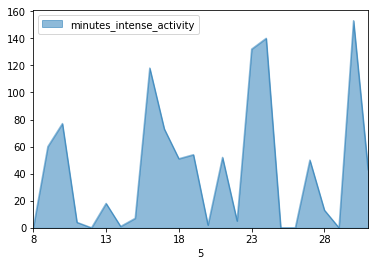

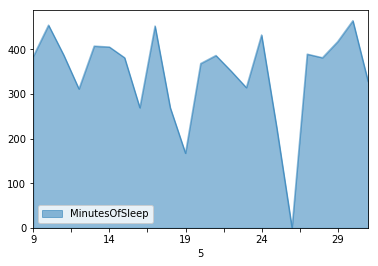

In [24]:
if __name__ == '__main__':
    main()